In [14]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

In [15]:
def clean_up_columns(data):
    df=pd.DataFrame()
    for old_name in data.columns:
        new_name = old_name.split('TRc1')[0][:-1]
        df[new_name]=data[old_name]
    return df

In [16]:
data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')
price = clean_up_columns(data)
data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
vol = clean_up_columns(data)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  app.launch_new_instance()


In [17]:
vol.pct_change().sort().min().sort_values()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


TOCOM-RUBBER                         -1.000000
EUREX-EURO BUXL                      -1.000000
SGX DT-NIKKEI STOCK AVG DIV          -1.000000
MONEP-CAC 40 INDEX                   -1.000000
EEX-YEARLY PEAKLOAD                  -1.000000
EEX-QUARTERLY PEAK LOAD              -1.000000
LIFFE-FTSE 250 INDEX                 -1.000000
EEX-MONTHLY BASELOAD                 -1.000000
LIFFE-3MTH STERLING                  -1.000000
CMX-HIGH GRADE COPPER                -1.000000
CME-1MTH EURODOLLAR COMP             -1.000000
CBT-ROUGH RICE                       -1.000000
BMF-ARABICA COFFEE                   -1.000000
LIFFE-SHORT EUROYEN TIBOR            -1.000000
EUREX-EURO BUND                      -1.000000
CME-NONFAT DRY MILK COMP.            -1.000000
TGE-ARABICA COFFEE                   -1.000000
CME-BRAZILIAN REAL COMP.             -1.000000
TGE-SOYBEANS                         -1.000000
OSLO-OBX INDEX                       -1.000000
TGE-NON GMO SOYBEAN                  -1.000000
ICE-NATURAL G

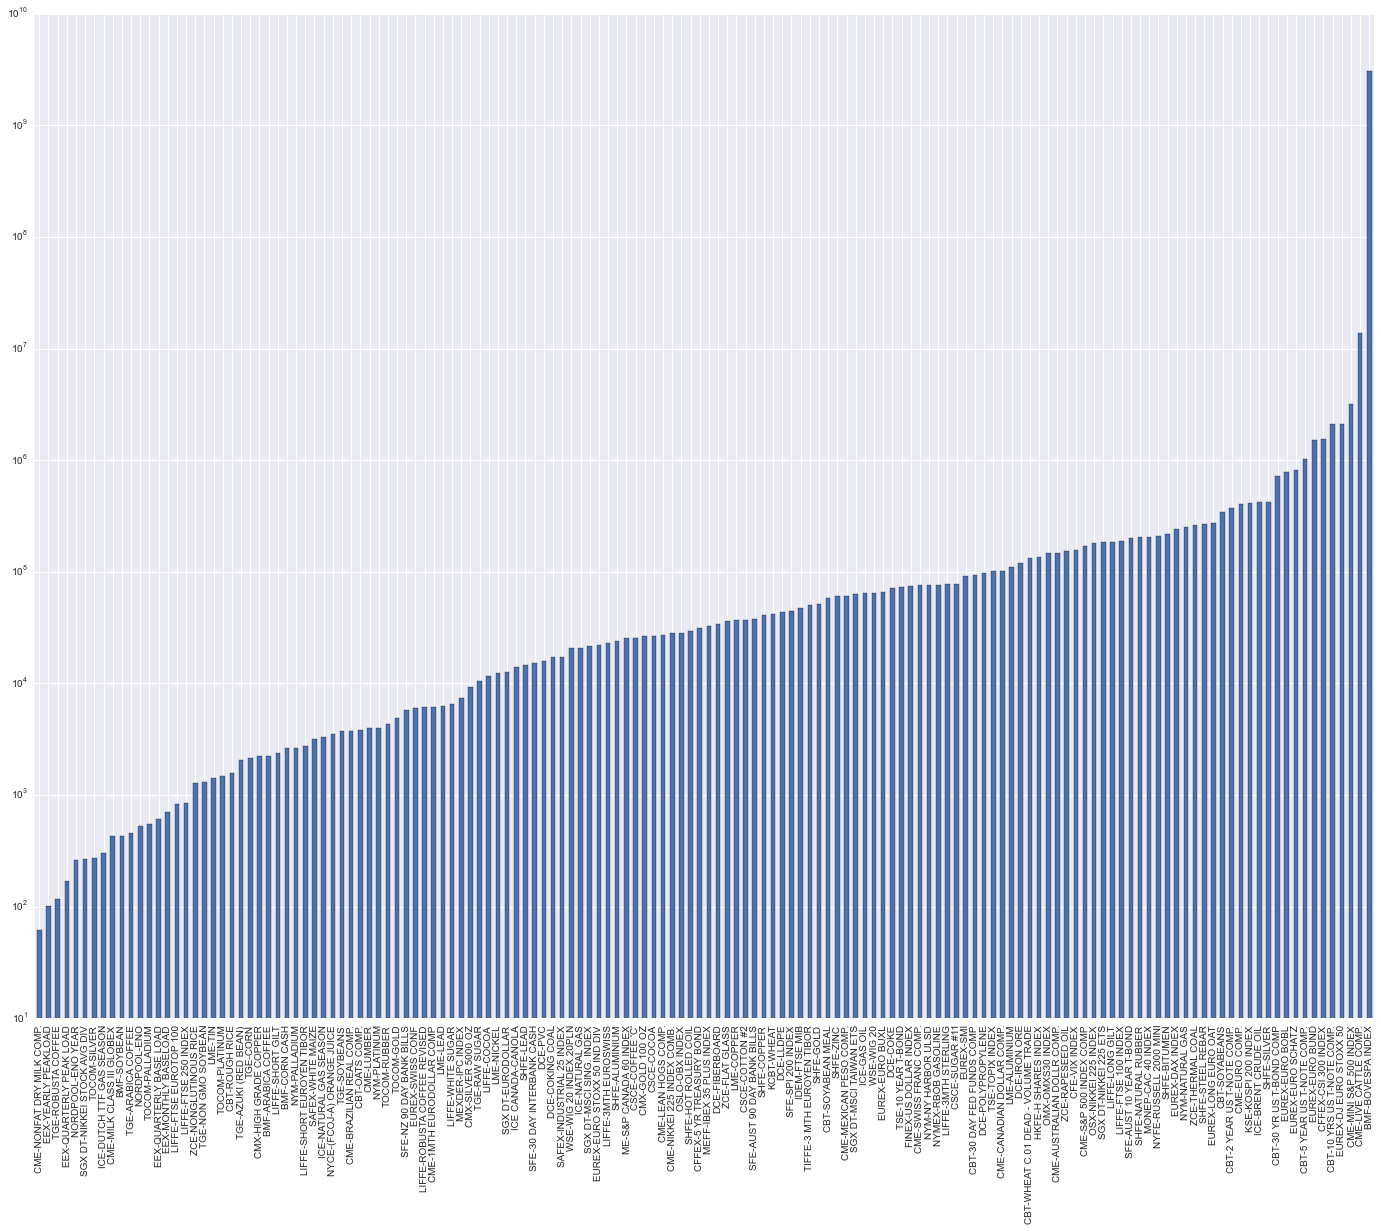

In [19]:
vol.max().sort_values().plot(kind='bar',logy=True)

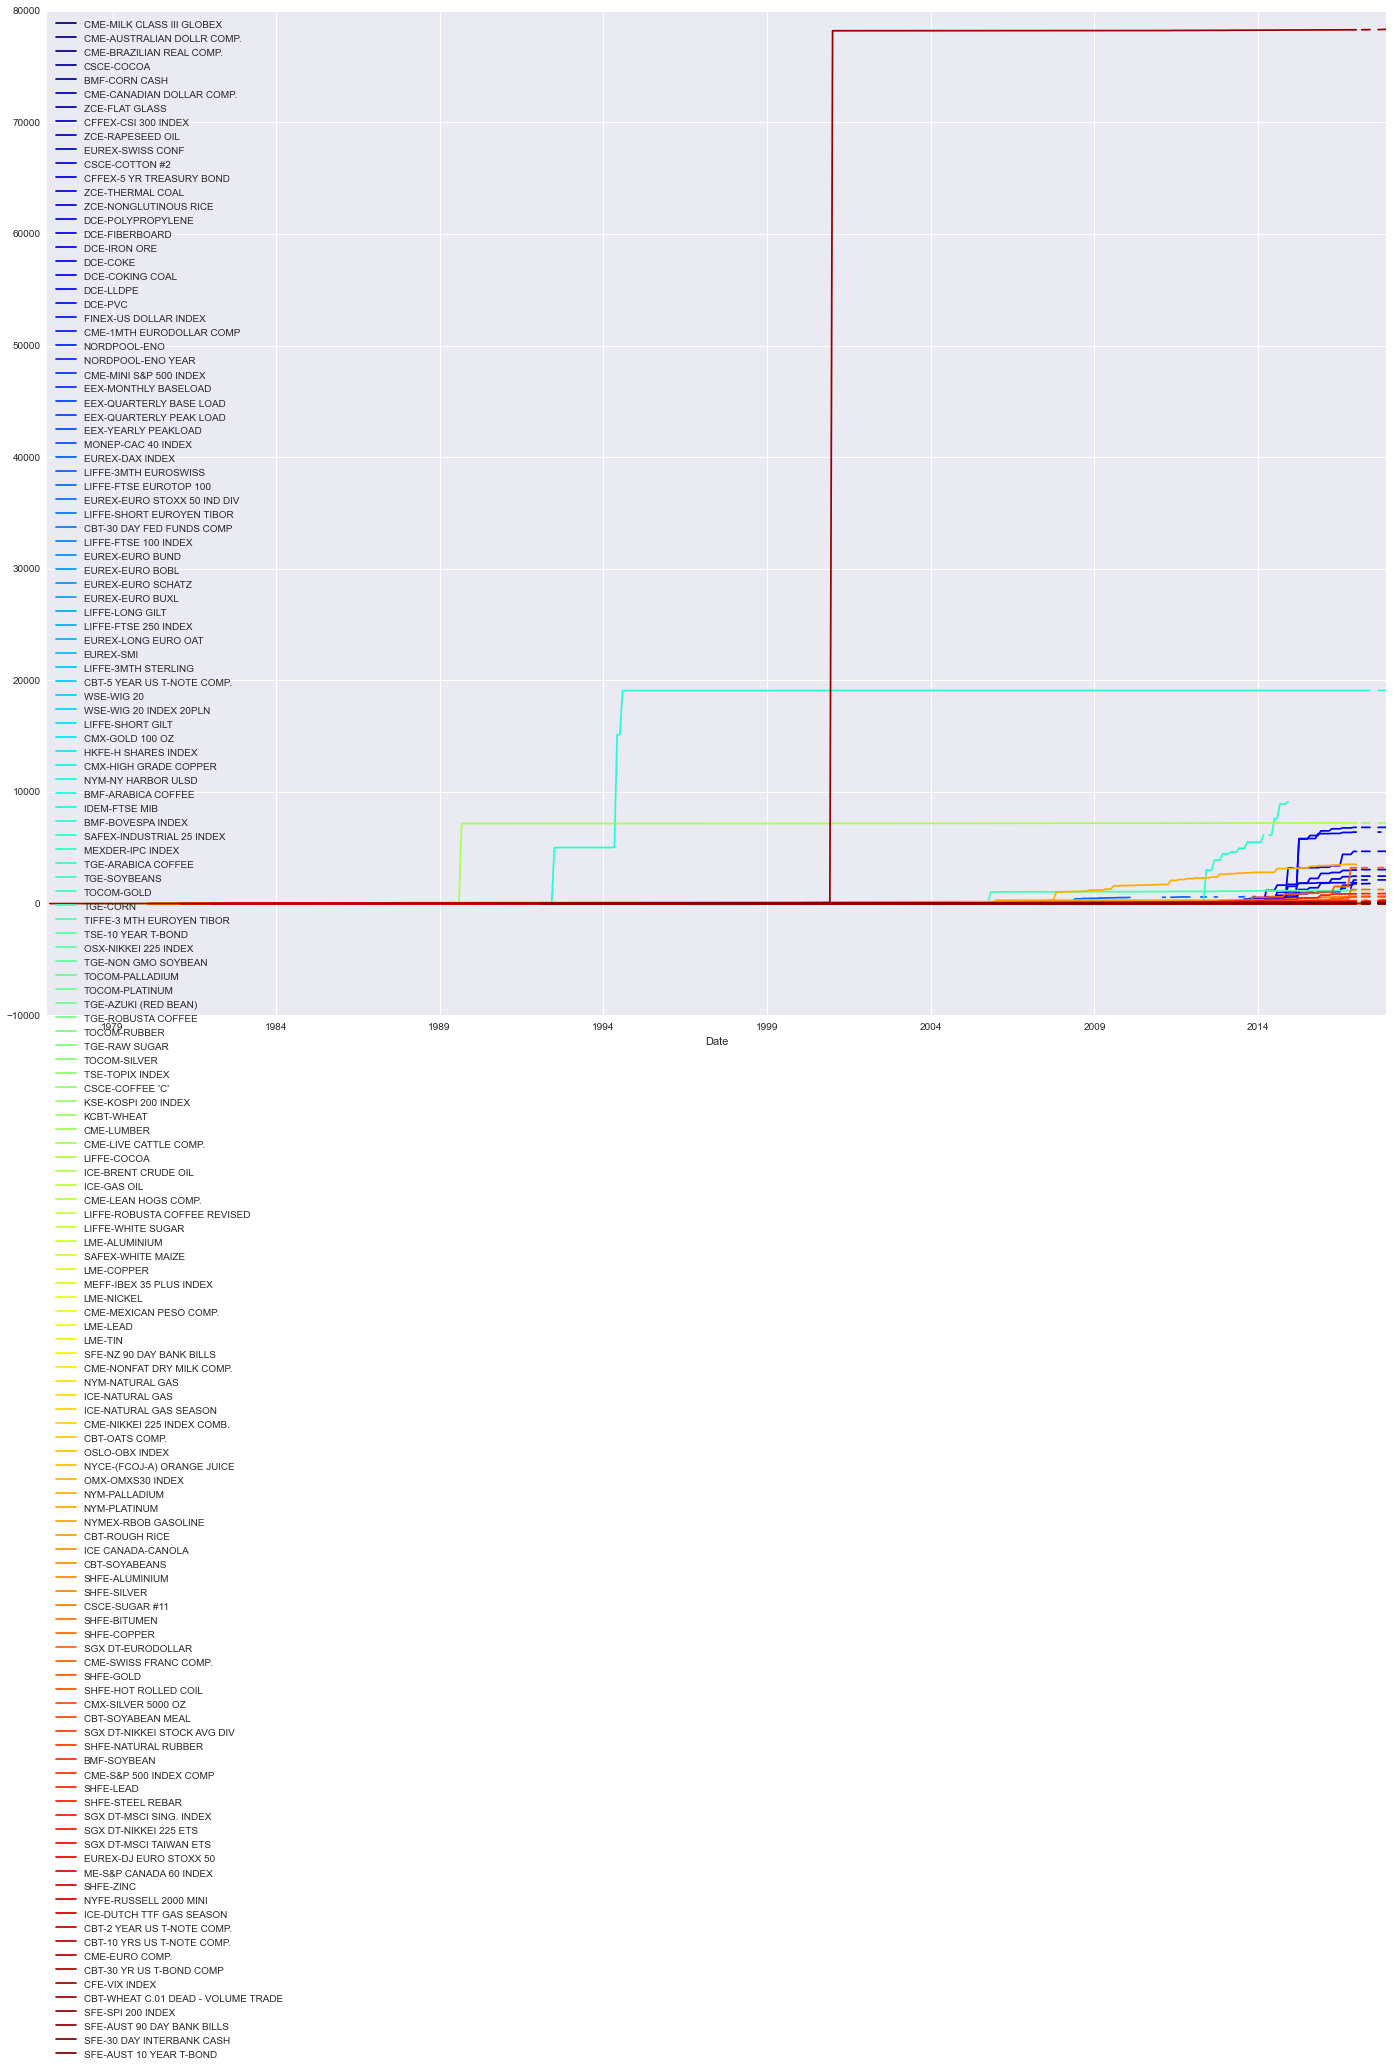

In [20]:
vol.pct_change().cumsum().plot(colormap='jet')

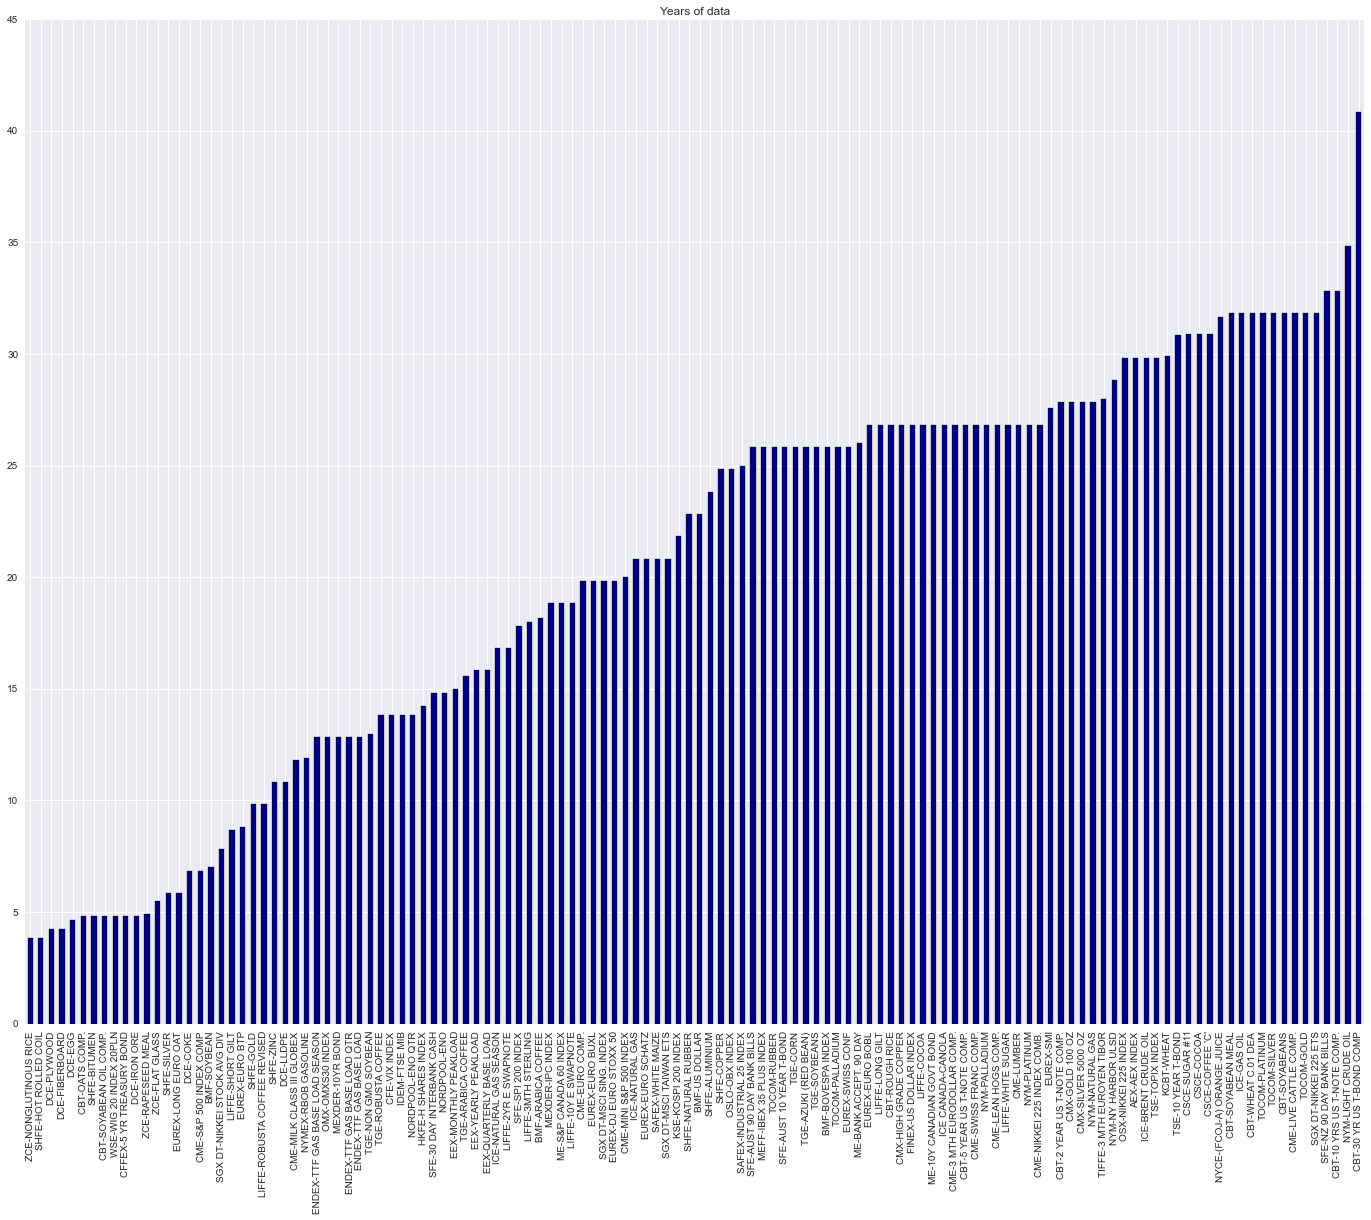

In [21]:
(price.count()/12.).sort_values().plot(colormap='jet',kind='bar',title='Years of data')

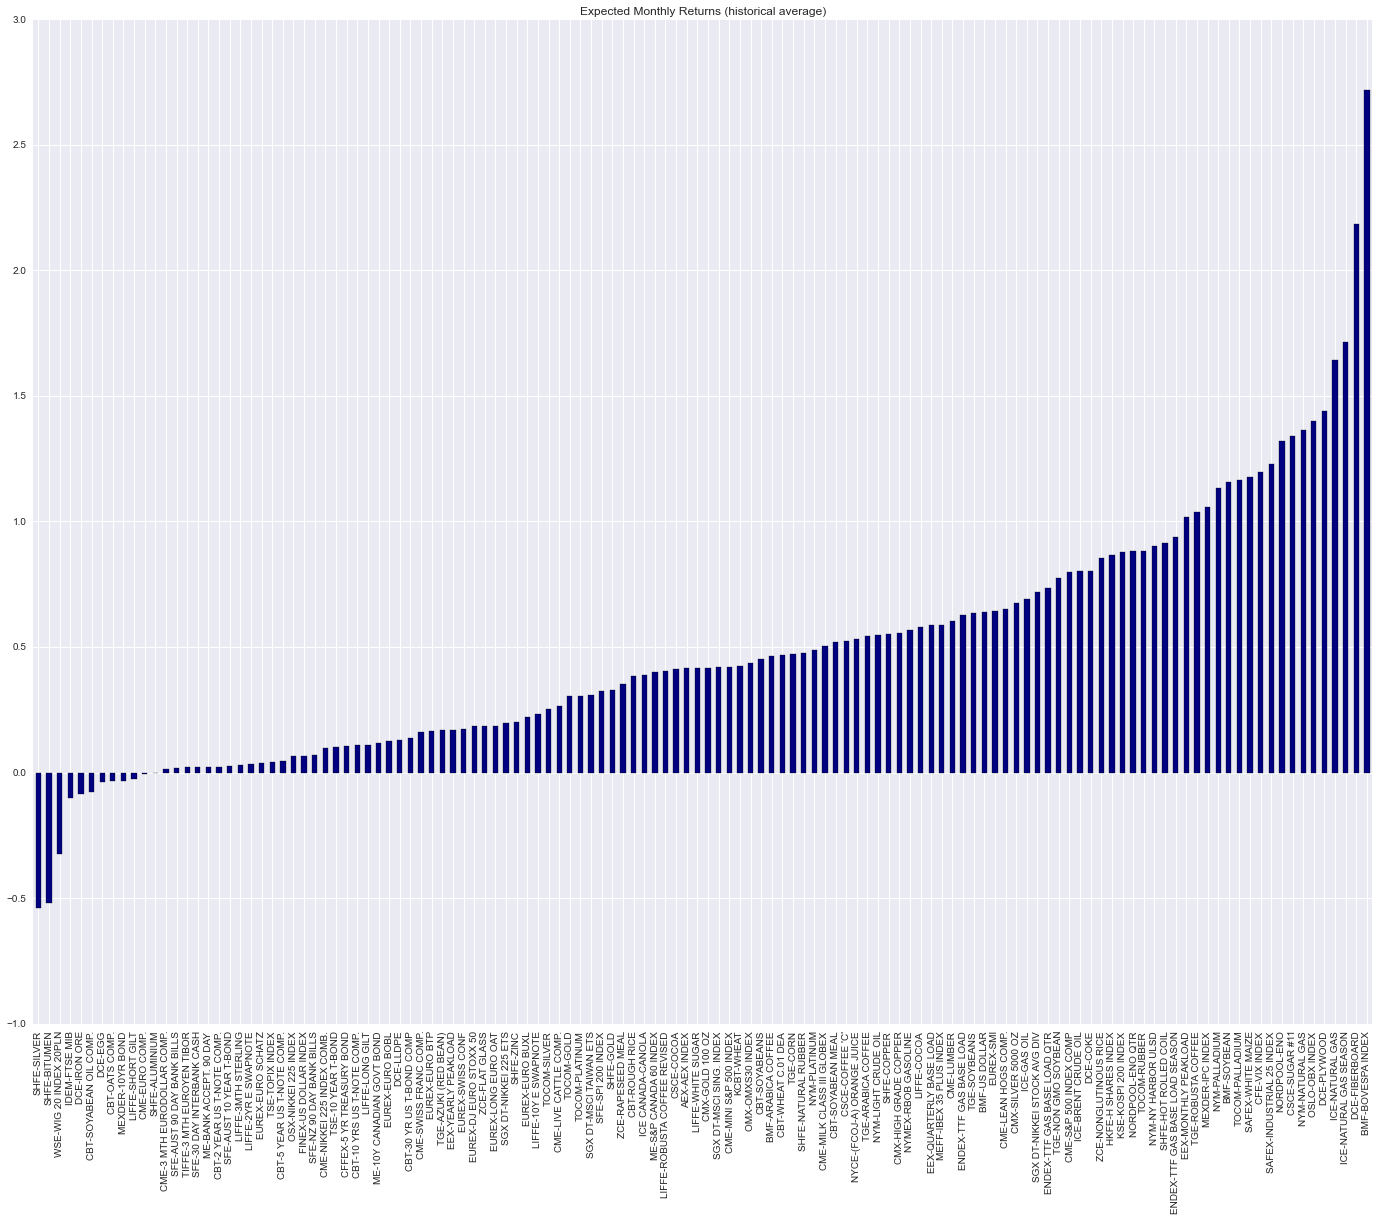

In [22]:
(price.pct_change().mean()*100).sort_values().plot(colormap='jet',title='Expected Monthly Returns (historical average)',kind='bar')

Dead markets by the end of 2016.  These markets should be removed.  

In [68]:
x=price['2016']
d=x.tail(1).T.isnull().columns[0]
x.T[x.tail(1).T.isnull()[d]].T.count()

MEXDER-10YR BOND             0
SAFEX-INDUSTRIAL 25 INDEX    0
TGE-ARABICA COFFEE           0
TGE-NON GMO SOYBEAN          0
TGE-ROBUSTA COFFEE           0
BMF-SOYBEAN                  0
dtype: int64

In [69]:
x=price['2015']
d=x.tail(1).T.isnull().columns[0]
x.T[x.tail(1).T.isnull()[d]].T.count()

SAFEX-INDUSTRIAL 25 INDEX    0
TGE-ARABICA COFFEE           0
TGE-NON GMO SOYBEAN          0
TGE-ROBUSTA COFFEE           0
BMF-SOYBEAN                  0
dtype: int64

In [70]:
x=price['2014']
d=x.tail(1).T.isnull().columns[0]
x.T[x.tail(1).T.isnull()[d]].T.count()

TGE-ARABICA COFFEE     0
TGE-NON GMO SOYBEAN    0
TGE-ROBUSTA COFFEE     0
BMF-SOYBEAN            0
dtype: int64

These marketsmay be dead now they had been in the land of the living for a long time

In [78]:
x=price['2016']
d=x.tail(1).T.isnull().columns[0]
dead_mkts=x.T[x.tail(1).T.isnull()[d]].T.columns
price[dead_mkts].count()/12.

MEXDER-10YR BOND             12.833333
SAFEX-INDUSTRIAL 25 INDEX    25.000000
TGE-ARABICA COFFEE           15.583333
TGE-NON GMO SOYBEAN          13.000000
TGE-ROBUSTA COFFEE           13.833333
BMF-SOYBEAN                   7.000000
dtype: float64